<a href="https://colab.research.google.com/github/dlcksgh1/hg-MachineLearningDeepLearning/blob/main/chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [혼자공부하는 머신러닝 + 딥러닝] 정리 Chapter 03 회귀 알고리즘과 모델 규제

#### k-최근접 이웃 회귀 알고리즘  :예측하려는 샘플에 가장 가까운 샘플  k 개를 선택 하여 수치들의 평균 값을 구하는 것

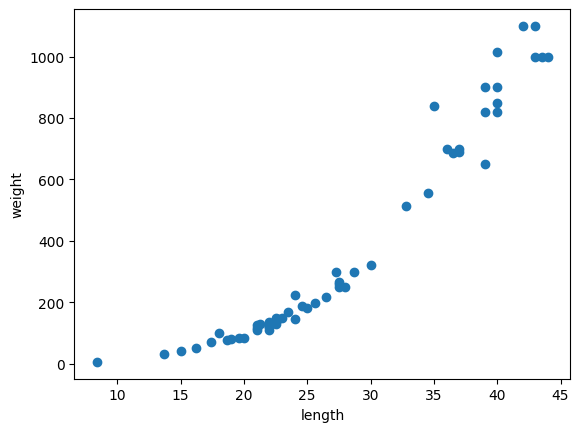

In [3]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 산점도 그리기
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()


In [10]:
# 훈련세트와 테스트세트 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length ,perch_weight, random_state=42)

# 사이킷런에 사용할 훈련 세트 2차원 배열이여야 한다.

train_input = train_input.reshape(-1, 1) # reshape 사용하여 2차원 배열로 변경
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)


(42, 1) (14, 1)


In [13]:
from sklearn.utils.fixes import sklearn
# k-최근접 이웃 회귀 알고리즘 훈련

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

knr.score(test_input, test_target)



0.992809406101064

In [14]:
# 타겟과 예측의 절대값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만든다
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

print(mae)




19.157142857142862


In [18]:
# 훈련 세트와 테스트 세트의 점수를 비교해보자

print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))

# 테스트 세트의 점수가 더 높기 때문에 과소적합이다.

0.9698823289099254
0.992809406101064


In [19]:
# 과소적합 문제를 해결하려면 모델을 조금 더 복잡하게 만들면 된다.
# k_최근접 이웃 알고리즘을 더 복잡하게 만드는 방법은 이웃의 개수 k 를 줄이면 된다. 기본값인 5 에서 3으로 변경

knr.n_neighbors = 3
knr.fit(train_input, train_target)


print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


### k-최근접 이웃의 한계

In [3]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


# 훈련세트와 테스트세트 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length ,perch_weight, random_state=42)

# 사이킷런에 사용할 훈련 세트 2차원 배열이여야 한다.

train_input = train_input.reshape(-1, 1) # reshape 사용하여 2차원 배열로 변경
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

print(knr.predict([[50]])) #길이기 50cm 인 농어의 무게를 1033g 으로 예측했지만 실제로는 더 무겁다.

[1033.33333333]


실제 무게와 많이 차이가 나기때문에 가장 가까운 이웃까지의 거리를 구해보자

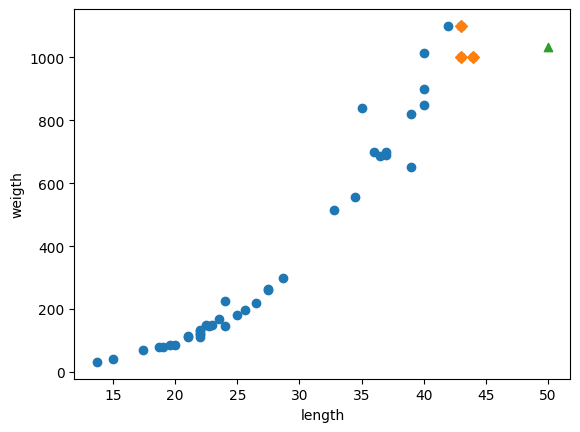

In [21]:
from tables import indexes
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트이 산점도를 그린다
plt.scatter(train_input, train_target)

#이웃 샘플 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터 그리기

plt.scatter(50, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

가장 가까운 농어의 데이터가 45cm 근방이기 때문에 평균값이 낮아서 문제가 발생 했던 것

In [22]:
print(np.mean(train_target[indexes]))


1033.3333333333333


### k-최근접 이웃 말고 다른 알고리즘을 알아보자

#### 선형회귀(linear regression)
널리 사용되는 대표적인 회귀 알고리즘. 비교적 간단하고 성능이 뛰어남 직선을 학습하는 알고리즘

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 알고리즘 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대하여 예측
print(lr.predict([[50]]))

[1241.83860323]


In [5]:

# y = ax + b 의 직선 그래프 에서 a ,b 를 찾아야하는데 그 값을 LinearRegression 클래스가 찾아준다
# 찾은 a, b 는 coef_ 와 intercept_ 속성에 저장되어 있다.

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


coef_, .intercept_ 를 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라메터 라고 부른다.

머신 러닝의 알고리즘은 훈련 과정에서 최적의 모델 파라메터를 찾는 것과 같습니다.

선형회귀 : 모델기반 학습

k-최근접 이웃 : 사례 기반 학습

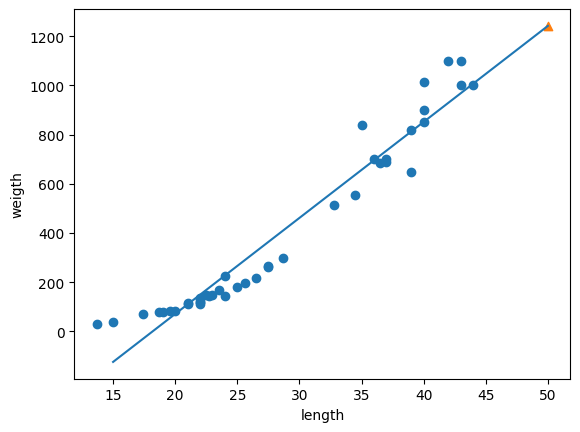

In [6]:
# 훈련 세트의 산점도와 15~50cm 의 직선을 그려보자

import matplotlib.pyplot as plt
plt.scatter(train_input,train_target)

plt.plot([15, 50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

#### 이제 훈련 세트 번위를 벗어난 농어의 무게도 예측 가능하다.

In [8]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))


0.939846333997604
0.8247503123313558


훈련 세트, 테스트 세트 둘다 점수가 높지 않다. 전체적으로 과소적합 되어있음을 확인

#### 현실적으로 무게가 0이하로 내려갈 수 없고, 전체 데이터를 보면 직선이 아닌 곡선에 가깝다.

### 최적의 곡선을 찾아보자(다항 회귀)

In [9]:
# 2차원 방정식의 그래프를 그리려면 갈아를 제곱한 항이 훈련 세트에 추가되어야 한다.

train_ploy = np.column_stack((train_input**2, train_input))
test_ploy = np.column_stack((test_input**2, test_input))

print(train_ploy.shape, test_ploy.shape)

(42, 2) (14, 2)


In [13]:
lr = LinearRegression()
lr.fit(train_ploy, train_target)

print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_) # 2차 방정식의 a, b, c 값을 알수있음

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


### 훈련 세트의 산점도와 그래프를 그려보자

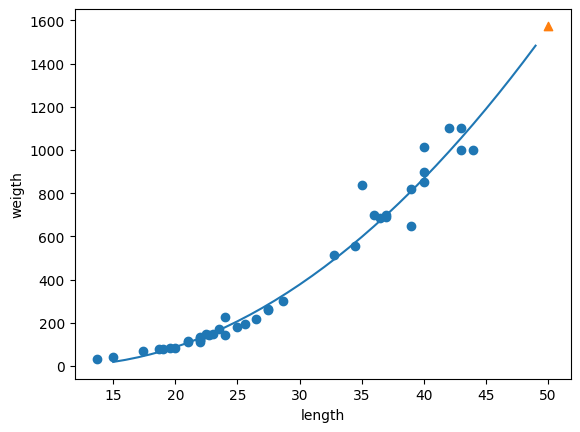

0.9706807451768623
0.9775935108325122


In [16]:
point = np.arange(15, 50) # 15~49 까지의 정수의 배열을 만든다

plt.scatter(train_input,train_target)

plt.plot(point, 1.01 * point**2 -21.6 * point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

print(lr.score(train_ploy,train_target))
print(lr.score(test_ploy,test_target))

앞선 단순 선형 회귀 모델보다 훨신 나은 그래프가 그려졌고 아직까진 과소적합이 남아 있다 모델을 조금 더 복작한 모델이 필요하다.

### 특성 공학과 규제

여러 개의 특성을 사용한 선형회귀를 다중 회귀(multiple regression) 라고 부릅니다.

In [10]:
# 판다스를 사용하여 길이, 높이 ,두께 데이터를 받아오자

import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
# print(perch_full)

import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full ,perch_weight, random_state=42)

### 사이킷런의 변환기

변환기 : 사이킷런은 특성을 만들거나 전처리를 하기 위한 다양한 클래스를 제공합니다. - fit(), transform() 메서드 제공

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2 ,3]]) # 특성2 와3으로 이루어진 샘플을 적용하면

print(poly.transform([[2, 3]])) # 일관된 api 를 하나로 붙인 fit_transform 도 있음




[[1. 2. 3. 4. 6. 9.]]


PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로곱한 항을 추가 합니다.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 기본 값인 1을 빼고
poly.fit([[2 ,3]]) # 특성2 와3으로 이루어진 샘플을 적용하면

print(poly.transform([[2, 3]])) # 일관된 api 를 하나로 붙인 fit_transform 도 있음

[[2. 3. 4. 6. 9.]]


In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 기본 값인 1을 빼고
poly.fit(train_input) # 특성2 와3으로 이루어진 샘플을 적용하면

train_poly = poly.transform(train_input)

print(train_poly.shape)

print(poly.get_feature_names_out()) # 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 확인가능

test_poly = poly.transform(test_input) # 테스트 세트 변환

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


### 다중 회귀 모델 훈련하기

In [21]:
from sklearn.linear_model import LinearRegression

lr =  LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


#### 테스트에 대한 점수가 높지는 않지만 과소적합 문제는 해결됨

더많은 특성을 추가해보자 3제곱, 4제곱

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5,include_bias=False) # 기본 값인 1을 빼고 5제곱 특성끼지
poly.fit(train_input) # 특성2 와3으로 이루어진 샘플을 적용하면

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) # 만들어진 특성이 55 개인 것을 확인

(42, 55)


In [23]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


훈련 세트의 점수는 거의 완벽한 점수이지만 특성의 개수를 크게 늘렸기 때문에 훈련 모델에 너무 과대적합이 되어버렸다.

### 규제
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

즉 훈련 세트에 과대적합 되지 않도록 만드는 것

In [24]:
# 규제를 적용하기 전 정규화 진행

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge), 라쏘(lasso) 라고 부른다.

릿지 :  계수를 제곱한 값을 기준

라쏘  : 계수의 절댓값을 기준

### 릿지 회귀

In [27]:
# 릿지 회귀

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


릿지 라쏘 모델은 규제의 양을 임의로 조절할 수 있습니다.

모델을 만들 때 alpha 매개변수로 규제의 강도를 조절

alpha 값은 머신러닝 모델이 학습 할 수 없고 사람이 지정 해 주어야 합니다.

사람이 지정해 주어야 하는 파라미터를 **하이퍼 파라미터** 라고 합니다.

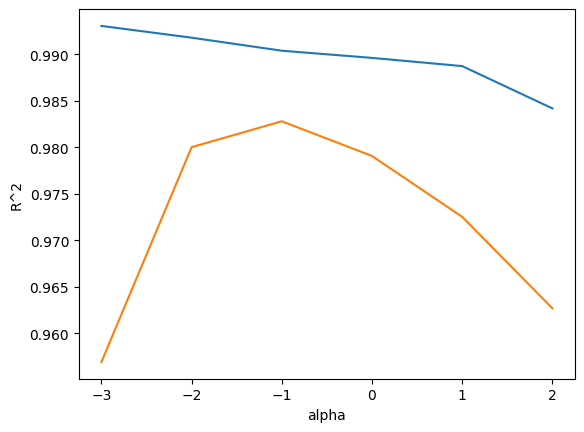

In [31]:
# alpha 값을 찾아보자

import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:

  #릿지 모델 생성
  ridge = Ridge(alpha=alpha)

  #릿지 모델 훈련
  ridge.fit(train_scaled, train_target)

  #훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


  # 그래프 그리기

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [32]:
# 두 그래프가 가장 가까운 값이 0.1
ridge = Ridge(alpha=0.1)

#릿지 모델 훈련
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))


0.9903815817570367
0.9827976465386928


### 라쏘 회귀


In [33]:
# 라쏘 회귀

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


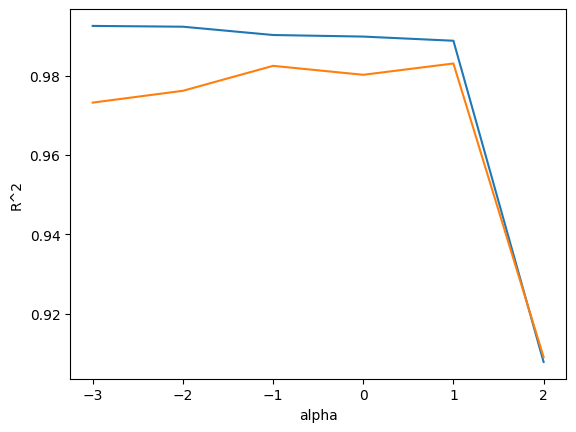

In [35]:
# alpha 값을 찾아보자

import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:

  #릿지 모델 생성
  lasso = Lasso(alpha=alpha, max_iter=10000)

  #릿지 모델 훈련
  lasso.fit(train_scaled, train_target)

  #훈련 점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))


  # 그래프 그리기

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [36]:
# 라쏘 모델에서 최적의 alpha 값은 10 이다

lasso = Lasso(alpha=10)

lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [38]:
# 라쏘 모델은 계수값을 0 으로 만들 수 있다

print(np.sum(lasso.coef_==0))  # 55개의 특성중 사용한 특성이 15개 밖애 되지 않는 것을 확인

40
